In [1]:
import pandas as pd
import torch
import numpy as np
from utils.utils_train import train_supervised, train_models_in_threads, test_model
from utils.utils_plots import plot_first_feature
from utils.utils_dataset import balance_dataset, prepare_dataset
from utils.utils_dataset import prepare_non_iid_dataset, plot_dataset_split, display_dataset_split
from utils.utils_metrics import calculate_metrics, plot_confusion_matrix, calculate_roc_auc
#%load_ext line_profiler

In [2]:
from model.eGauss_plus import eGAUSSp

In [3]:
# Load the dataset
file_path = 'Datasets/creditcard.csv'
data = pd.read_csv(file_path)


In [4]:


device =  torch.device("cpu")# torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_clients = 10

proportion = 10
data = balance_dataset(data, proportion)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
client_train, test_data, all_data = prepare_dataset(X, y, num_clients, smote = False) 


In [5]:
# Model parameters
local_model_params = {
    "feature_dim": 30,
    "num_classes": 2,
    "kappa_n": 2,
    "num_sigma": 2,
    "kappa_join": 1.2,
    "S_0": 1e-8,
    "c_max": 1,
    "device": device
}

federated_model_params = {
    "feature_dim": 30,
    "num_classes": 2,
    "kappa_n": 2,
    "num_sigma": 2,
    "kappa_join": 1.2,
    "S_0": 1e-8,
    "c_max": 1,
    "device": device
}

# Initialize a model for each client
local_models = [eGAUSSp(**local_model_params) for _ in range(num_clients)]
federated_model = eGAUSSp(**federated_model_params)

In [6]:

display_dataset_split(client_train, test_data)
#plot_dataset_split(client_train, test_data)

Client 1: {0: 41, 1: 28}
Client 2: {0: 30, 1: 39}
Client 3: {0: 31, 1: 38}
Client 4: {0: 39, 1: 30}
Client 5: {0: 34, 1: 35}
Client 6: {0: 24, 1: 45}
Client 7: {0: 33, 1: 36}
Client 8: {0: 33, 1: 36}
Client 9: {0: 40, 1: 28}
Client 10: {0: 35, 1: 33}
Test Set: {0: 152, 1: 144}

Combined Number of Samples per Class:
Class 0: 492 samples
Class 1: 492 samples

Total Number of Samples Across All Datasets: 984


In [7]:

import cProfile
%load_ext line_profiler

if False:


    # Assuming models and client_data are already defined
    #for client_idx, client_model in enumerate(local_models):
    
    data, labels = client_train[0]
    
    model = local_models[0]
    pr = cProfile.Profile()
    pr.enable()
    train_supervised(model, client_train[0])
    pr.disable()
    pr.print_stats(sort='cumtime')

#plot_first_feature(client_train[client_idx], model=client_model, num_sigma=2, N_max=1)  



In [8]:
if False:
       data, labels = client_train[0]
       model = local_models[0]

       %lprun -f model.forward\
              -f model.merging_mech.compute_kappa_matrix \
              -f model.merging_mech.merging_mechanism \
              -f model.merging_mech.update_merging_condition \
              -f model.merging_mech.compute_merging_condition\
              -f model.merging_mech.perform_merge\
              train_supervised(model, client_train[0])

--- Communication Round 1 ---

Training model for client 1
Evolving has been enabled.

Training model for client 2
Evolving has been enabled.
Matrix of cluster 0 is not positive semidefinite. Minimum eigenvalue: -2.3268593452030473e-07
Critical error! Negative distance detected in Gamma computation, which should be impossible
Critical error! Negative distance detected in Gamma computation, which should be impossible
Critical error! Negative distance detected in Gamma computation, which should be impossible
Critical error! Negative distance detected in Gamma computation, which should be impossible
Critical error! Negative distance detected in Gamma computation, which should be impossible
Critical error! Negative distance detected in Gamma computation, which should be impossible
Matrix of cluster 0 is not positive semidefinite. Minimum eigenvalue: -2.3268593452030473e-07
Critical error! Negative distance detected in Gamma computation, which should be impossible
Critical error! Negative d

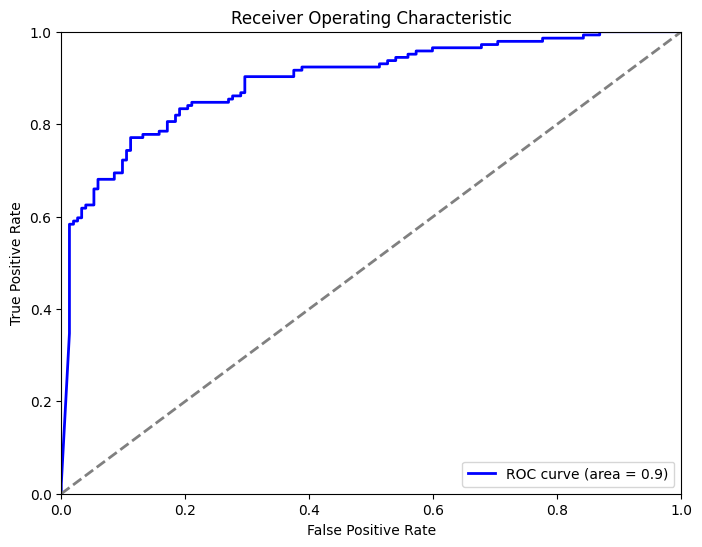

Test Metrics: {'accuracy': 0.722972972972973, 'precision': 0.9696969696969697, 'recall': 0.4444444444444444, 'f1_score': 0.6095238095238095}
Test ROC AUC: 0.893686038011696
Returning updated model to client 1
Returning updated model to client 2
Returning updated model to client 3
Returning updated model to client 4
Returning updated model to client 5
Returning updated model to client 6
Returning updated model to client 7
Returning updated model to client 8
Returning updated model to client 9
Returning updated model to client 10
--- End of Round 1 ---

--- Communication Round 2 ---

Training model for client 1
Evolving has been enabled.

Training model for client 2
Evolving has been enabled.
Matrix of cluster 0 is not positive semidefinite. Minimum eigenvalue: -8.48422985200159e-08
Matrix of cluster 0 is not positive semidefinite. Minimum eigenvalue: -8.48422985200159e-08
Matrix of cluster 0 is not positive semidefinite. Minimum eigenvalue: -8.48422985200159e-08
Critical error! Negative

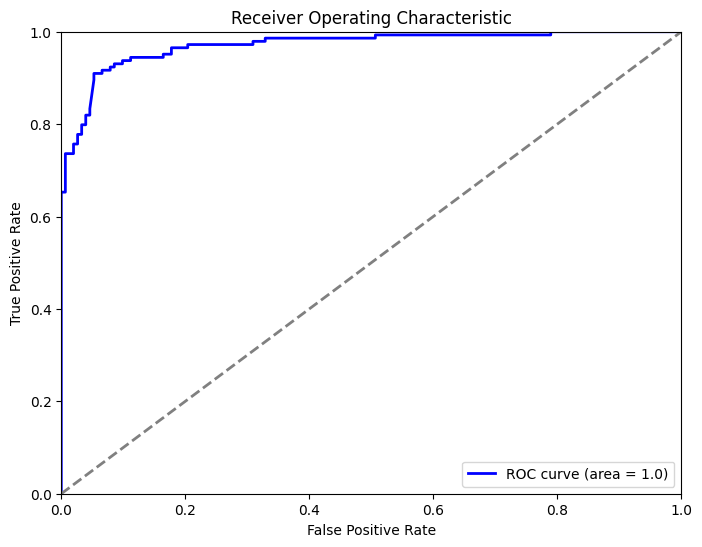

Test Metrics: {'accuracy': 0.9256756756756757, 'precision': 0.9295774647887324, 'recall': 0.9166666666666666, 'f1_score': 0.9230769230769231}
Test ROC AUC: 0.9710115131578947
Returning updated model to client 1
Returning updated model to client 2
Returning updated model to client 3
Returning updated model to client 4
Returning updated model to client 5
Returning updated model to client 6
Returning updated model to client 7
Returning updated model to client 8
Returning updated model to client 9
Returning updated model to client 10
--- End of Round 2 ---

--- Communication Round 3 ---

Training model for client 1
Evolving has been enabled.

Training model for client 2
Evolving has been enabled.
Critical error! Negative distance detected in Gamma computation, which should be impossible
Matrix of cluster 0 is not positive semidefinite. Minimum eigenvalue: -8.48422985200159e-08
Matrix of cluster 0 is not positive semidefinite. Minimum eigenvalue: -8.48422985200159e-08
Matrix of cluster 0 is

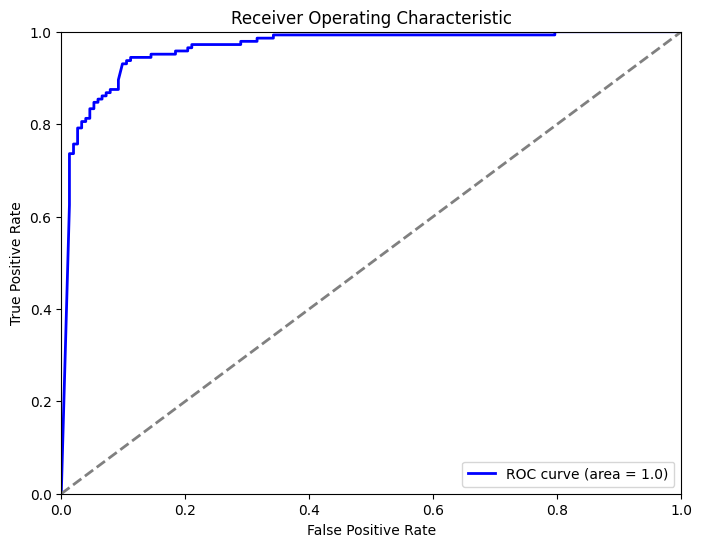

Test Metrics: {'accuracy': 0.902027027027027, 'precision': 0.9020979020979021, 'recall': 0.8958333333333334, 'f1_score': 0.8989547038327526}
Test ROC AUC: 0.9647523757309943
Returning updated model to client 1
Returning updated model to client 2
Returning updated model to client 3
Returning updated model to client 4
Returning updated model to client 5
Returning updated model to client 6
Returning updated model to client 7
Returning updated model to client 8
Returning updated model to client 9
Returning updated model to client 10
--- End of Round 3 ---

--- Communication Round 4 ---

Training model for client 1
Evolving has been enabled.

Training model for client 2
Evolving has been enabled.
Critical error! Negative distance detected in Gamma computation, which should be impossible
Matrix of cluster 0 is not positive semidefinite. Minimum eigenvalue: -8.48422985200159e-08
Matrix of cluster 0 is not positive semidefinite. Minimum eigenvalue: -8.48422985200159e-08
Matrix of cluster 0 is 

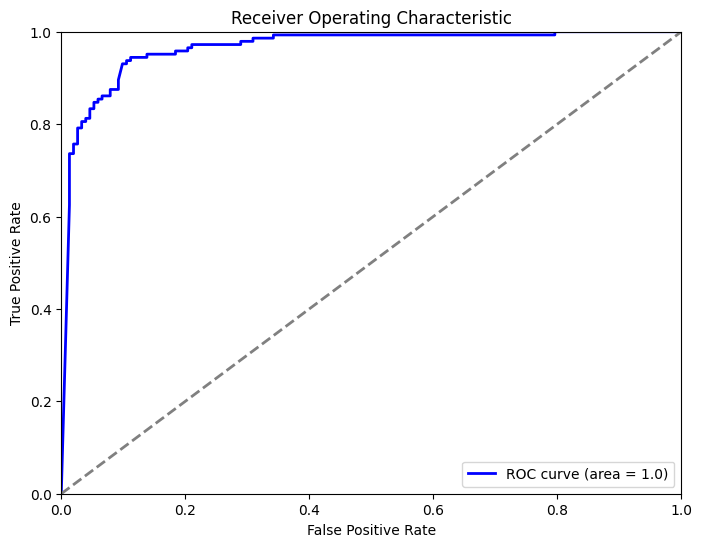

Test Metrics: {'accuracy': 0.902027027027027, 'precision': 0.9020979020979021, 'recall': 0.8958333333333334, 'f1_score': 0.8989547038327526}
Test ROC AUC: 0.9647980628654971
Returning updated model to client 1
Returning updated model to client 2
Returning updated model to client 3
Returning updated model to client 4
Returning updated model to client 5
Returning updated model to client 6
Returning updated model to client 7
Returning updated model to client 8
Returning updated model to client 9
Returning updated model to client 10
--- End of Round 4 ---

--- Communication Round 5 ---

Training model for client 1
Evolving has been enabled.

Training model for client 2
Evolving has been enabled.
Critical error! Negative distance detected in Gamma computation, which should be impossible
Matrix of cluster 0 is not positive semidefinite. Minimum eigenvalue: -8.48422985200159e-08
Matrix of cluster 0 is not positive semidefinite. Minimum eigenvalue: -8.48422985200159e-08
Matrix of cluster 0 is 

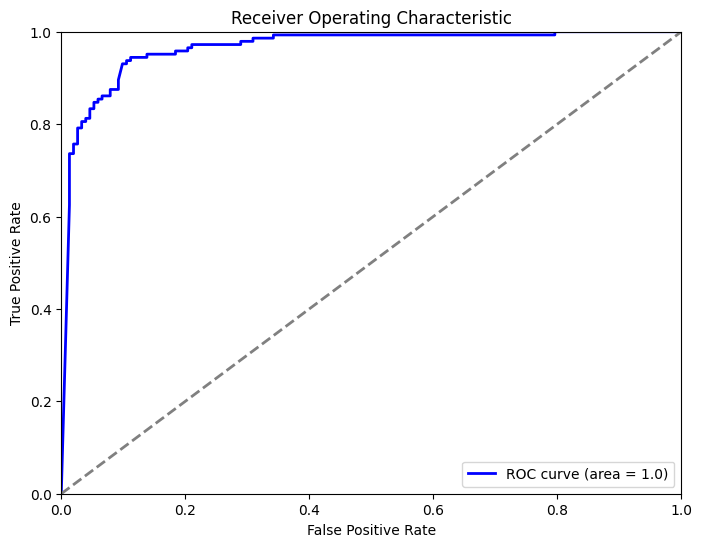

Test Metrics: {'accuracy': 0.902027027027027, 'precision': 0.9020979020979021, 'recall': 0.8958333333333334, 'f1_score': 0.8989547038327526}
Test ROC AUC: 0.9647980628654971
Returning updated model to client 1
Returning updated model to client 2
Returning updated model to client 3
Returning updated model to client 4
Returning updated model to client 5
Returning updated model to client 6
Returning updated model to client 7
Returning updated model to client 8
Returning updated model to client 9
Returning updated model to client 10
--- End of Round 5 ---

--- Communication Round 6 ---

Training model for client 1
Evolving has been enabled.

Training model for client 2
Evolving has been enabled.
Critical error! Negative distance detected in Gamma computation, which should be impossible
Matrix of cluster 0 is not positive semidefinite. Minimum eigenvalue: -8.48422985200159e-08
Matrix of cluster 0 is not positive semidefinite. Minimum eigenvalue: -8.48422985200159e-08
Matrix of cluster 0 is 

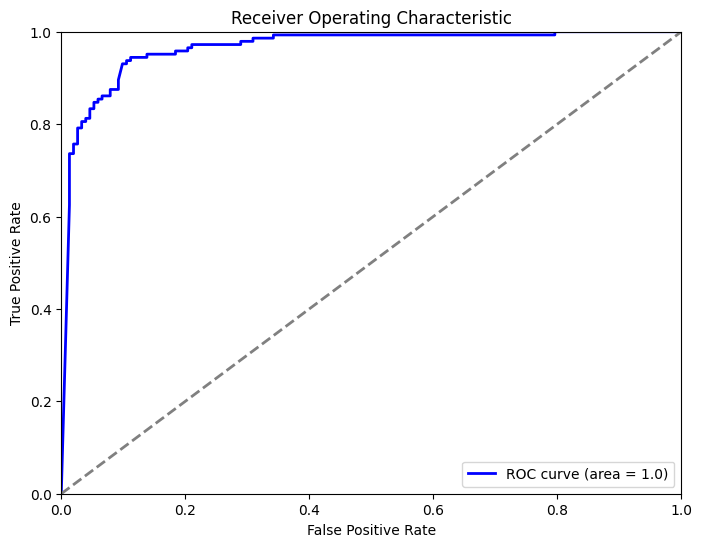

Test Metrics: {'accuracy': 0.902027027027027, 'precision': 0.9020979020979021, 'recall': 0.8958333333333334, 'f1_score': 0.8989547038327526}
Test ROC AUC: 0.9647980628654971
Returning updated model to client 1
Returning updated model to client 2
Returning updated model to client 3
Returning updated model to client 4
Returning updated model to client 5
Returning updated model to client 6
Returning updated model to client 7
Returning updated model to client 8
Returning updated model to client 9
Returning updated model to client 10
--- End of Round 6 ---

--- Communication Round 7 ---

Training model for client 1
Evolving has been enabled.

Training model for client 2
Evolving has been enabled.
Critical error! Negative distance detected in Gamma computation, which should be impossible
Matrix of cluster 0 is not positive semidefinite. Minimum eigenvalue: -8.48422985200159e-08
Matrix of cluster 0 is not positive semidefinite. Minimum eigenvalue: -8.48422985200159e-08
Matrix of cluster 0 is 

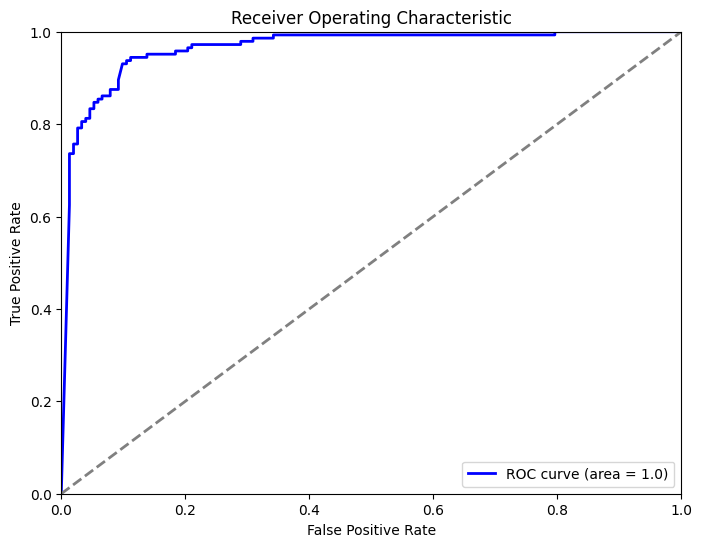

Test Metrics: {'accuracy': 0.902027027027027, 'precision': 0.9020979020979021, 'recall': 0.8958333333333334, 'f1_score': 0.8989547038327526}
Test ROC AUC: 0.9647980628654971
Returning updated model to client 1
Returning updated model to client 2
Returning updated model to client 3
Returning updated model to client 4
Returning updated model to client 5
Returning updated model to client 6
Returning updated model to client 7
Returning updated model to client 8
Returning updated model to client 9
Returning updated model to client 10
--- End of Round 7 ---

--- Communication Round 8 ---

Training model for client 1
Evolving has been enabled.

Training model for client 2
Evolving has been enabled.
Critical error! Negative distance detected in Gamma computation, which should be impossible
Matrix of cluster 0 is not positive semidefinite. Minimum eigenvalue: -8.48422985200159e-08
Matrix of cluster 0 is not positive semidefinite. Minimum eigenvalue: -8.48422985200159e-08
Matrix of cluster 0 is 

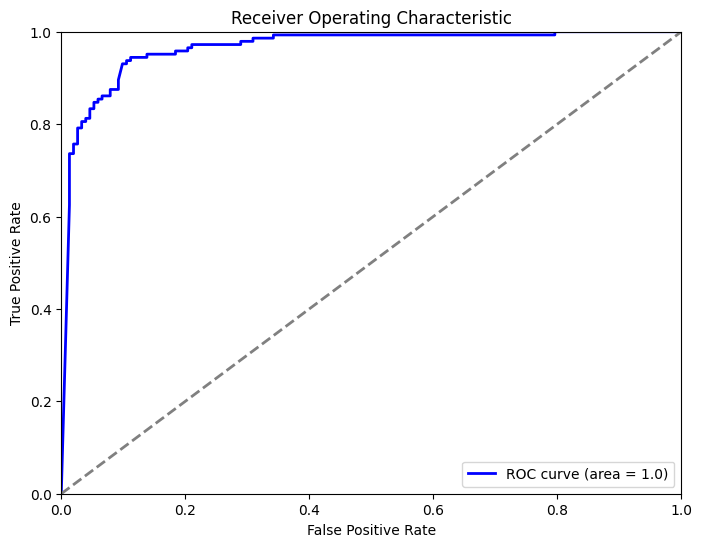

Test Metrics: {'accuracy': 0.902027027027027, 'precision': 0.9020979020979021, 'recall': 0.8958333333333334, 'f1_score': 0.8989547038327526}
Test ROC AUC: 0.9647980628654971
Returning updated model to client 1
Returning updated model to client 2
Returning updated model to client 3
Returning updated model to client 4
Returning updated model to client 5
Returning updated model to client 6
Returning updated model to client 7
Returning updated model to client 8
Returning updated model to client 9
Returning updated model to client 10
--- End of Round 8 ---

--- Communication Round 9 ---

Training model for client 1
Evolving has been enabled.

Training model for client 2
Evolving has been enabled.
Critical error! Negative distance detected in Gamma computation, which should be impossible
Matrix of cluster 0 is not positive semidefinite. Minimum eigenvalue: -8.48422985200159e-08
Matrix of cluster 0 is not positive semidefinite. Minimum eigenvalue: -8.48422985200159e-08
Matrix of cluster 0 is 

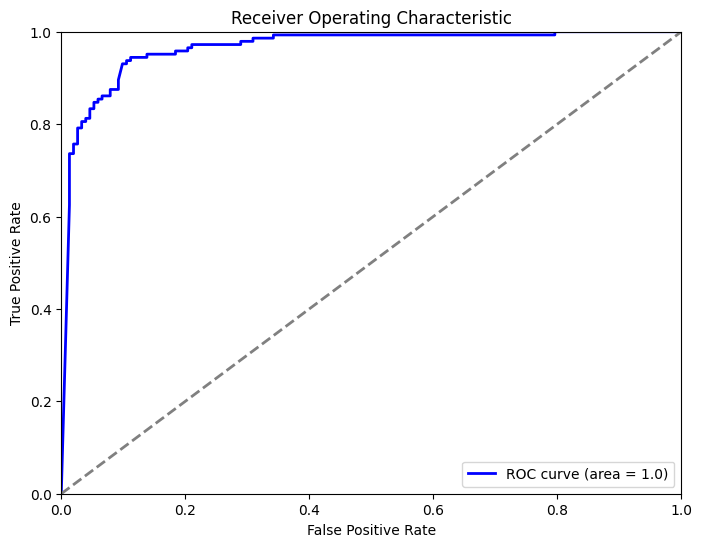

Test Metrics: {'accuracy': 0.902027027027027, 'precision': 0.9020979020979021, 'recall': 0.8958333333333334, 'f1_score': 0.8989547038327526}
Test ROC AUC: 0.9647980628654971
Returning updated model to client 1
Returning updated model to client 2
Returning updated model to client 3
Returning updated model to client 4
Returning updated model to client 5
Returning updated model to client 6
Returning updated model to client 7
Returning updated model to client 8
Returning updated model to client 9
Returning updated model to client 10
--- End of Round 9 ---

--- Communication Round 10 ---

Training model for client 1
Evolving has been enabled.

Training model for client 2
Evolving has been enabled.
Critical error! Negative distance detected in Gamma computation, which should be impossible
Matrix of cluster 0 is not positive semidefinite. Minimum eigenvalue: -8.48422985200159e-08
Matrix of cluster 0 is not positive semidefinite. Minimum eigenvalue: -8.48422985200159e-08
Matrix of cluster 0 is

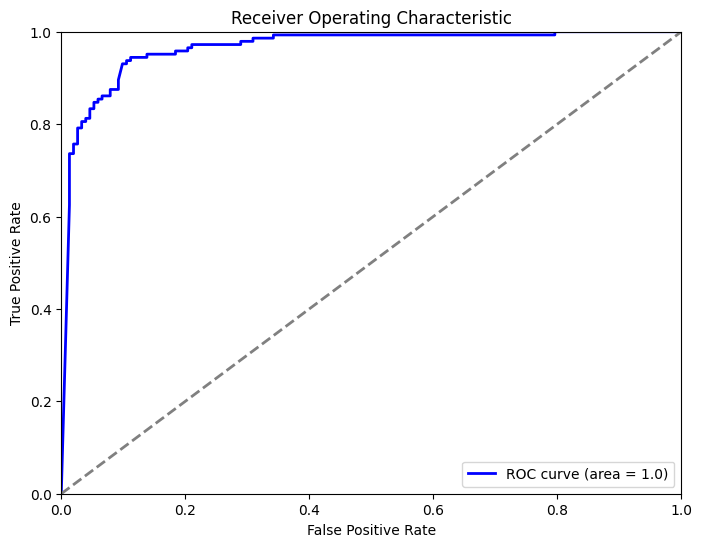

Test Metrics: {'accuracy': 0.902027027027027, 'precision': 0.9020979020979021, 'recall': 0.8958333333333334, 'f1_score': 0.8989547038327526}
Test ROC AUC: 0.9647980628654971
Returning updated model to client 1
Returning updated model to client 2
Returning updated model to client 3
Returning updated model to client 4
Returning updated model to client 5
Returning updated model to client 6
Returning updated model to client 7
Returning updated model to client 8
Returning updated model to client 9
Returning updated model to client 10
--- End of Round 10 ---



In [9]:
# Assuming local_models, client_train, and federated_model are already defined
# Number of communication rounds
num_rounds = 10

for round in range(num_rounds):
    print(f"--- Communication Round {round + 1} ---")

    # Train local model
        #Train the models
    for client_idx, client_model in enumerate(local_models):
        
        #Supervised clustering
        print(f"\nTraining model for client {client_idx + 1}")
        train_supervised(client_model, client_train[client_idx])

    # Update federated model with local models
    for client_idx, client_model in enumerate(local_models):
        print(f"Updating federated model with client {client_idx + 1}")
        federated_model.federal_agent.merge_model_privately(client_model, client_model.kappa_n)
        # Perform federated merging and removal mechanism on the federated model
        print(f"Number of clusters before merging = {federated_model.c}")
        federated_model.federal_agent.federated_merging()
       
    if federated_model.c > 0:
        # Evaluate federated model
        all_scores, pred_max, _ = test_model(federated_model, test_data)
        metrics = calculate_metrics(pred_max, test_data, "binary")
        roc_auc = calculate_roc_auc(all_scores, test_data)
        print(f"Test Metrics: {metrics}")
        print(f"Test ROC AUC: {roc_auc}")

        # Return the updated federated model to each client
        for client_idx, client_model in enumerate(local_models):
            print(f"Returning updated model to client {client_idx + 1}")
            client_model.federal_agent.merge_model_privately(federated_model, 1)

    print(f"--- End of Round {round + 1} ---\n")


In [10]:
'''
for client_idx, client_model in enumerate(local_models):
        print(f"Merging client {client_idx + 1}")
        #print(f"Number of client {client_idx + 1} clusters before merging = {torch.sum(client_model.n[:client_model.c]>client_model.kappa_n)}")
        #client_model.federal_agent.federated_merging() 
        print(f"Number of client {client_idx + 1} after merging = {torch.sum(client_model.n[:client_model.c]>client_model.kappa_n)}")
        federated_model.federal_agent.merge_model_privately(client_model, client_model.kappa_n)

print(f"Number of clusters after transfer = {federated_model.c}")
'''

'\nfor client_idx, client_model in enumerate(local_models):\n        print(f"Merging client {client_idx + 1}")\n        #print(f"Number of client {client_idx + 1} clusters before merging = {torch.sum(client_model.n[:client_model.c]>client_model.kappa_n)}")\n        #client_model.federal_agent.federated_merging() \n        print(f"Number of client {client_idx + 1} after merging = {torch.sum(client_model.n[:client_model.c]>client_model.kappa_n)}")\n        federated_model.federal_agent.merge_model_privately(client_model, client_model.kappa_n)\n\nprint(f"Number of clusters after transfer = {federated_model.c}")\n'

In [11]:
'''
federated_model.federal_agent.federated_merging()
federated_model.removal_mech.removal_mechanism()
print(f"Number of clusters after merging = {federated_model.c}")
'''

'\nfederated_model.federal_agent.federated_merging()\nfederated_model.removal_mech.removal_mechanism()\nprint(f"Number of clusters after merging = {federated_model.c}")\n'

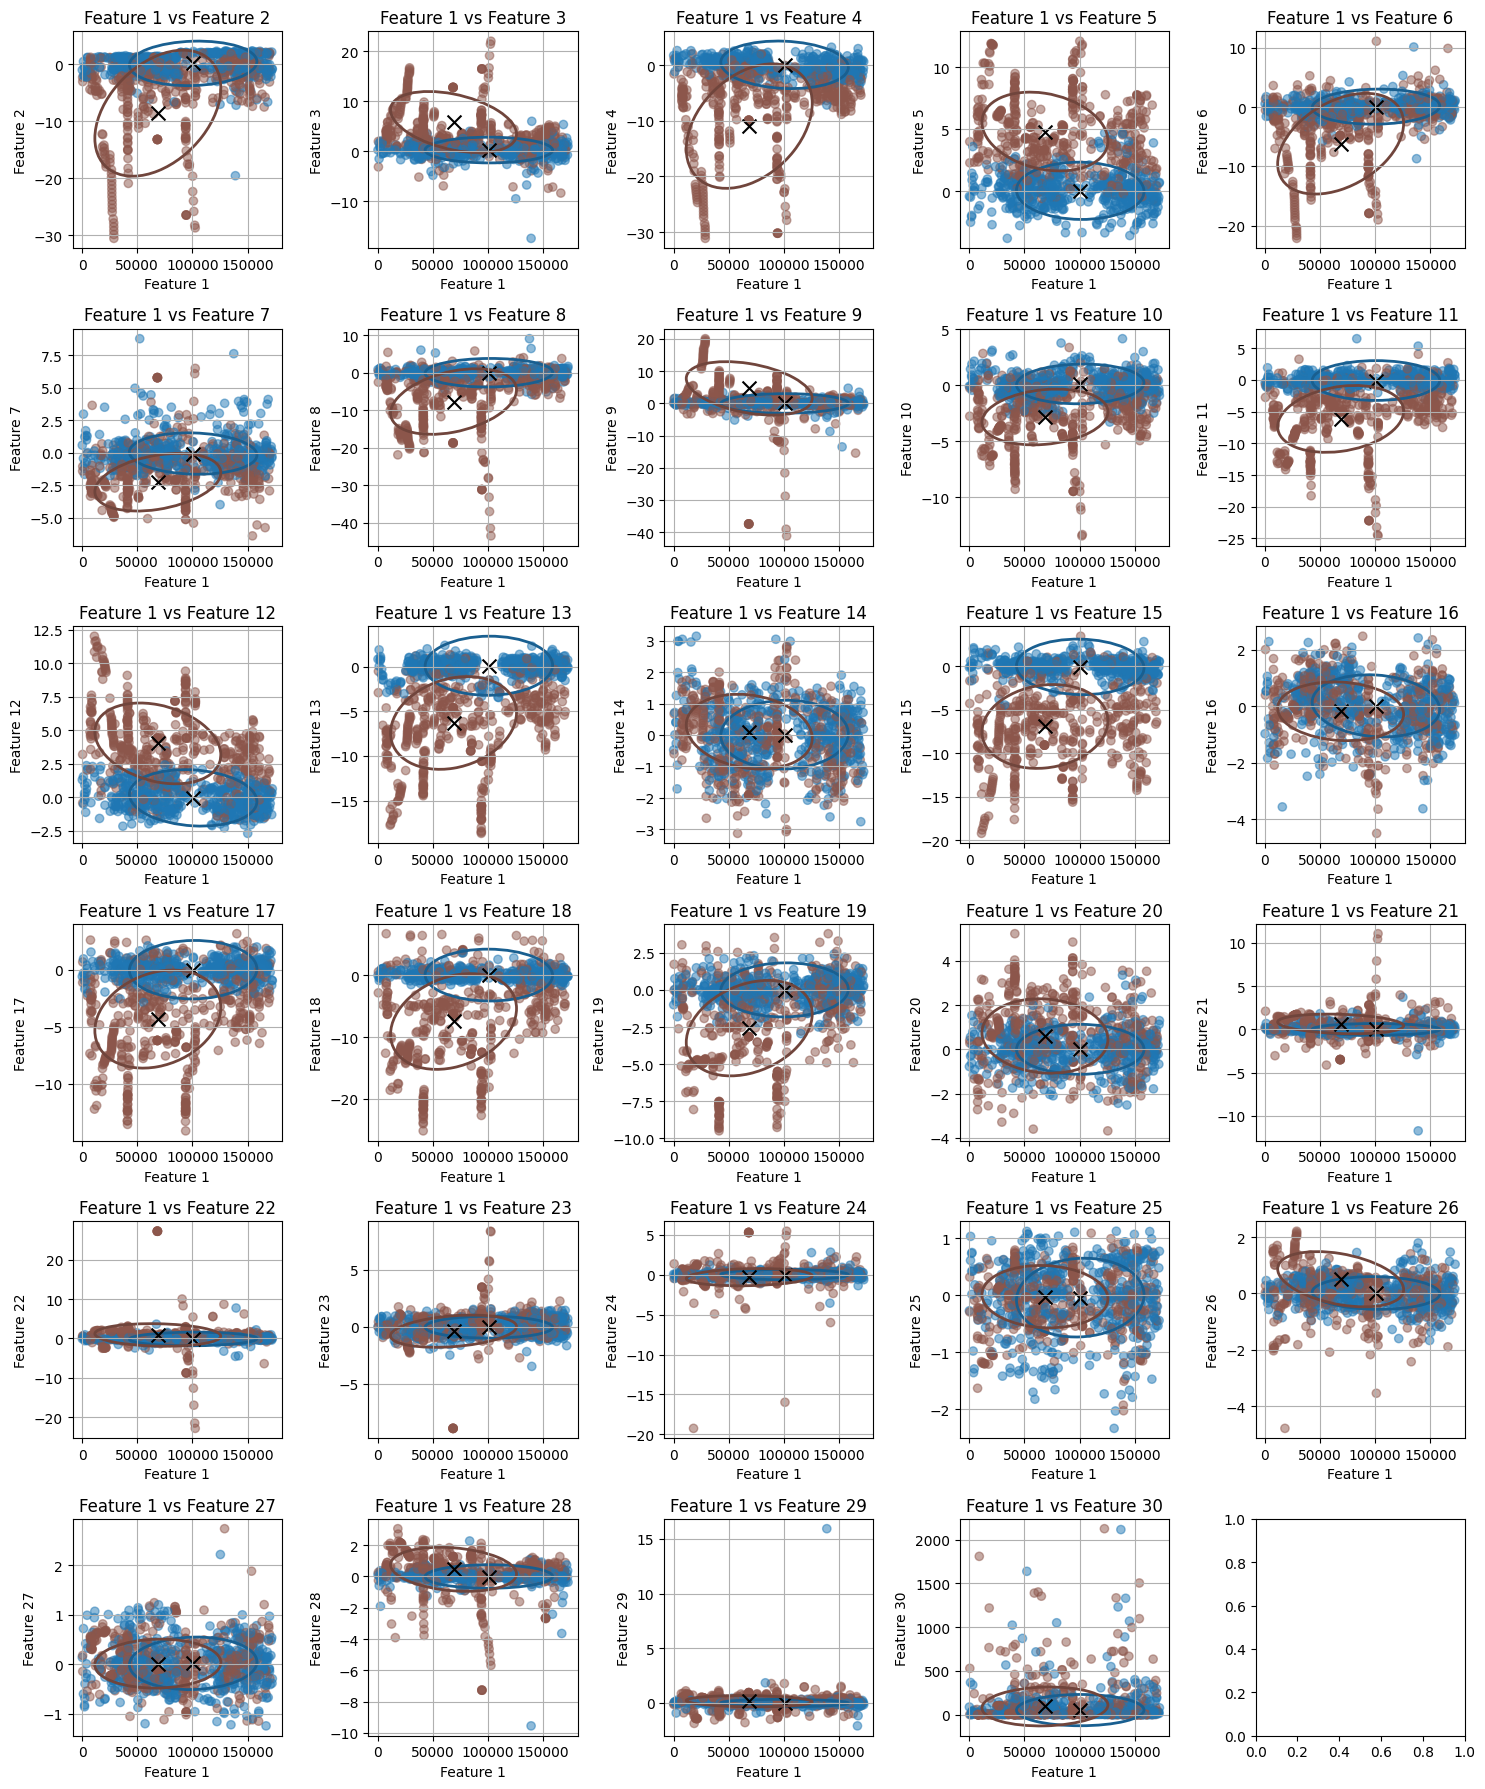

In [12]:

plot_first_feature(all_data, model=federated_model, num_sigma=federated_model.num_sigma, N_max=1)   


Testing federated model
Evolving has been disabled.
Test Metrics: {'accuracy': 0.902027027027027, 'precision': 0.9020979020979021, 'recall': 0.8958333333333334, 'f1_score': 0.8989547038327526}


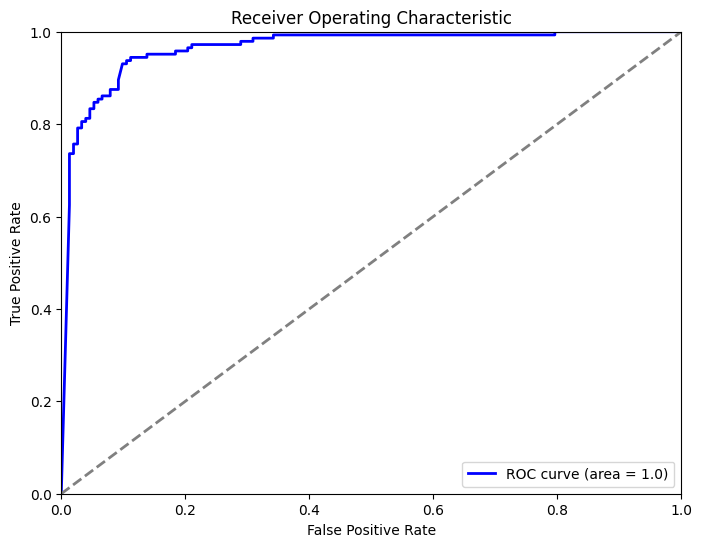

Test ROC AUC: 0.9647980628654971


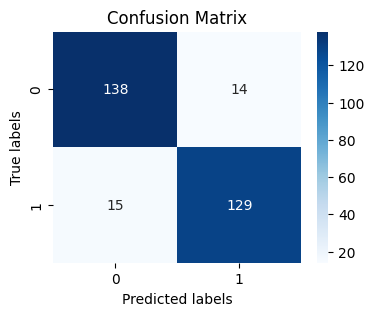

In [13]:


print(f"\nTesting federated model")   

all_scores, pred_max, _ = test_model(federated_model, test_data)
metrics = calculate_metrics(pred_max, test_data, "binary")
print(f"Test Metrics: {metrics}")
roc_auc = calculate_roc_auc(all_scores, test_data)
print(f"Test ROC AUC: {roc_auc}")

plot_confusion_matrix(pred_max, test_data)

In [14]:

'''
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Confusion matrix values
tn = 135
fn = 10
tp = 132
fp = 19

# Creating the confusion matrix
y_true = [0]*tn + [1]*fn + [1]*tp + [0]*fp  # 0 for negative class, 1 for positive class
y_pred = [0]*(tn+fn) + [1]*(fp+tp)  # Predictions

# Calculating metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(accuracy, precision, recall, f1)
'''

'\nfrom sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score\n\n# Confusion matrix values\ntn = 135\nfn = 10\ntp = 132\nfp = 19\n\n# Creating the confusion matrix\ny_true = [0]*tn + [1]*fn + [1]*tp + [0]*fp  # 0 for negative class, 1 for positive class\ny_pred = [0]*(tn+fn) + [1]*(fp+tp)  # Predictions\n\n# Calculating metrics\naccuracy = accuracy_score(y_true, y_pred)\nprecision = precision_score(y_true, y_pred)\nrecall = recall_score(y_true, y_pred)\nf1 = f1_score(y_true, y_pred)\n\nprint(accuracy, precision, recall, f1)\n'